<a href="https://colab.research.google.com/github/pesricha/datascience-visualization-project/blob/main/Delhi_Government_School_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset.
Link = https://www.data.gov.in/resource/district-wise-number-schoolsstudent-enrollment-and-pass-percentage-class-x-and-xii-delhi

In [2]:
url = "https://raw.githubusercontent.com/pesricha/datascience-visualization-project/refs/heads/main/EducationDataset_2023-24.csv"
df = pd.read_csv(url)
display(df.head())

,District,No of Zone,No of Schools - Primary,No of Schools - Middle,No of Schools - Sec,No of Schools - Sr. Sec,No of Schools - Total,No of Students - Pre Primary,No of Students - Primary,No of Students - Middle,...,No of Students - Total,Class X and XII Result - DISTRICT,NUMBER OF STUDENTS APPEARED IN CLASS X \n(Before Compt.) - 2023-24,TOTAL NUMBER OF STUDENTS PASSED IN CLASS X \n(Before Compt.) - 2023-24,PASS PERCENTAGE IN CLASS X - \n(Before Compt.) - 2023-24,QUALITY INDEX IN CLASS X - \n(Before Compt) - 2023-24,TOTAL NUMBER OF STUDENTS APPEARED IN CLASS XII - \n(Before Compt.) - 2023-24,TOTAL NUMBER OF STUDENTS PASSED IN CLASS XII - \n(Before Compt.) - 2023-24,PASS PERCENTAGE IN CLASS XII - (Before Compt.) - 2023-24,QUALITY INDEX IN CLASS XII - (Before Compt.) - 2023-24
0,East,3,1,1,8,111,121,3714,18017,72599,...,189406,East,19921,18544,93.09,278.54,17768,17014,95.76,306.59
1,North East-I,1,0,2,2,44,48,712,3610,49688,...,126931,North East-I,16703,14919,89.32,265.52,14367,13513,94.06,299.35
2,North,2,0,4,8,53,65,2023,9128,29545,...,77396,North,7501,6867,91.55,279.29,7214,6979,96.74,310.93
3,North West A,2,0,0,7,110,117,2553,11034,82575,...,180388,North West A,18468,18158,98.32,281.77,15278,15038,98.43,320.85
4,North West B-I,2,0,0,0,84,84,3997,15676,58992,...,142549,North West B-I,13093,12126,92.61,272.07,12148,11795,97.09,307.10


### Dataset Analysis
Let's examine the structure and basic statistics of our education dataset.

In [3]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (16, 24)

Column Names:
['District', 'No of Zone', 'No of Schools - Primary', 'No of Schools - Middle', 'No of Schools - Sec', 'No of Schools - Sr. Sec', 'No of Schools - Total', 'No of Students - Pre Primary', 'No of Students - Primary', 'No of Students - Middle', 'No of Students - Secondary', 'No of Students - Sr Secondary', 'No of Students - Boys', 'No of Students - Girls', 'No of Students - Total', 'Class X and XII Result - DISTRICT', 'NUMBER OF STUDENTS APPEARED IN CLASS X \n(Before Compt.) - 2023-24', 'TOTAL NUMBER OF STUDENTS PASSED IN CLASS X \n(Before Compt.) - 2023-24', ' PASS PERCENTAGE IN CLASS X - \n(Before Compt.) - 2023-24', ' QUALITY INDEX IN CLASS X - \n(Before Compt) - 2023-24', 'TOTAL NUMBER OF STUDENTS APPEARED IN CLASS XII - \n(Before Compt.) - 2023-24', 'TOTAL NUMBER OF STUDENTS PASSED IN CLASS XII - \n(Before Compt.) - 2023-24', 'PASS PERCENTAGE IN CLASS XII - (Before Compt.) - 2023-24', 'QUALITY INDEX IN CLASS XII - (Before Compt.) - 2023-24']

Da

In [4]:
# Check for missing values and data quality
print("Missing values in each column:")
print(df.isnull().sum())
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Sample values: {df[col].unique()[:5]}")
    print()

# Clean column names (remove extra spaces, etc.)
df.columns = df.columns.str.strip()
print("Cleaned column names:")
print(df.columns.tolist())

Missing values in each column:
District                                                                        0
No of Zone                                                                      0
No of Schools - Primary                                                         0
No of Schools - Middle                                                          0
No of Schools - Sec                                                             0
No of Schools - Sr. Sec                                                         0
No of Schools - Total                                                           0
No of Students - Pre Primary                                                    0
No of Students - Primary                                                        0
No of Students - Middle                                                         0
No of Students - Secondary                                                      0
No of Students - Sr Secondary                                      

## Data Visualizations

### 1. Scatter Plot
Analyzing the relationship between student enrollment and pass percentage for Class X and XII

<Figure size 1200x800 with 0 Axes>

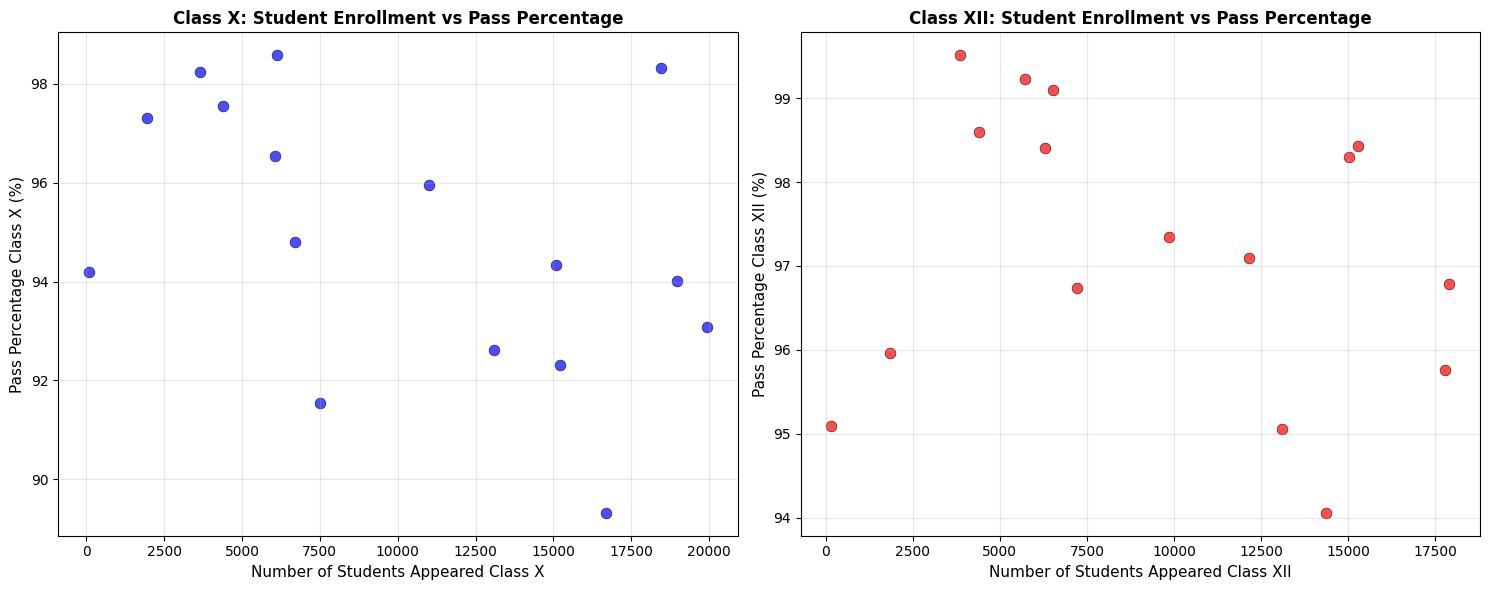

Correlation between number of students appeared and pass percentage:
Class X: -0.437
Class XII: -0.227


In [5]:
# Scatter Plot: Student Enrollment vs Pass Percentage
plt.figure(figsize=(12, 8))

# Create subplot for Class X and XII
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Extract numeric data from columns and handle any non-numeric values
class_x_appeared = pd.to_numeric(df['NUMBER OF STUDENTS APPEARED IN CLASS X \n(Before Compt.) - 2023-24'], errors='coerce')
class_x_pass_pct = pd.to_numeric(df['PASS PERCENTAGE IN CLASS X - \n(Before Compt.) - 2023-24'], errors='coerce')
class_xii_appeared = pd.to_numeric(df['TOTAL NUMBER OF STUDENTS APPEARED IN CLASS XII - \n(Before Compt.) - 2023-24'], errors='coerce')
class_xii_pass_pct = pd.to_numeric(df['PASS PERCENTAGE IN CLASS XII - (Before Compt.) - 2023-24'], errors='coerce')

# Remove rows with NaN values for plotting
mask_x = ~(class_x_appeared.isna() | class_x_pass_pct.isna())
mask_xii = ~(class_xii_appeared.isna() | class_xii_pass_pct.isna())

# Scatter plot for Class X
ax1.scatter(class_x_appeared[mask_x], class_x_pass_pct[mask_x],
           alpha=0.7, color='blue', s=60, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Number of Students Appeared Class X', fontsize=11)
ax1.set_ylabel('Pass Percentage Class X (%)', fontsize=11)
ax1.set_title('Class X: Student Enrollment vs Pass Percentage', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Scatter plot for Class XII
ax2.scatter(class_xii_appeared[mask_xii], class_xii_pass_pct[mask_xii],
           alpha=0.7, color='red', s=60, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Number of Students Appeared Class XII', fontsize=11)
ax2.set_ylabel('Pass Percentage Class XII (%)', fontsize=11)
ax2.set_title('Class XII: Student Enrollment vs Pass Percentage', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlation
corr_x = class_x_appeared[mask_x].corr(class_x_pass_pct[mask_x])
corr_xii = class_xii_appeared[mask_xii].corr(class_xii_pass_pct[mask_xii])
print(f"Correlation between number of students appeared and pass percentage:")
print(f"Class X: {corr_x:.3f}")
print(f"Class XII: {corr_xii:.3f}")

In [6]:
# Let's check the exact column names in the dataset
print("Exact column names:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

Exact column names:
0: 'District'
1: 'No of Zone'
2: 'No of Schools - Primary'
3: 'No of Schools - Middle'
4: 'No of Schools - Sec'
5: 'No of Schools - Sr. Sec'
6: 'No of Schools - Total'
7: 'No of Students - Pre Primary'
8: 'No of Students - Primary'
9: 'No of Students - Middle'
10: 'No of Students - Secondary'
11: 'No of Students - Sr Secondary'
12: 'No of Students - Boys'
13: 'No of Students - Girls'
14: 'No of Students - Total'
15: 'Class X and XII Result - DISTRICT'
16: 'NUMBER OF STUDENTS APPEARED IN CLASS X 
(Before Compt.) - 2023-24'
17: 'TOTAL NUMBER OF STUDENTS PASSED IN CLASS X 
(Before Compt.) - 2023-24'
18: 'PASS PERCENTAGE IN CLASS X - 
(Before Compt.) - 2023-24'
19: 'QUALITY INDEX IN CLASS X - 
(Before Compt) - 2023-24'
20: 'TOTAL NUMBER OF STUDENTS APPEARED IN CLASS XII - 
(Before Compt.) - 2023-24'
21: 'TOTAL NUMBER OF STUDENTS PASSED IN CLASS XII - 
(Before Compt.) - 2023-24'
22: 'PASS PERCENTAGE IN CLASS XII - (Before Compt.) - 2023-24'
23: 'QUALITY INDEX IN CLASS XI

### 2. Box Plot
Analyzing the distribution of pass percentages and quality indices across different districts

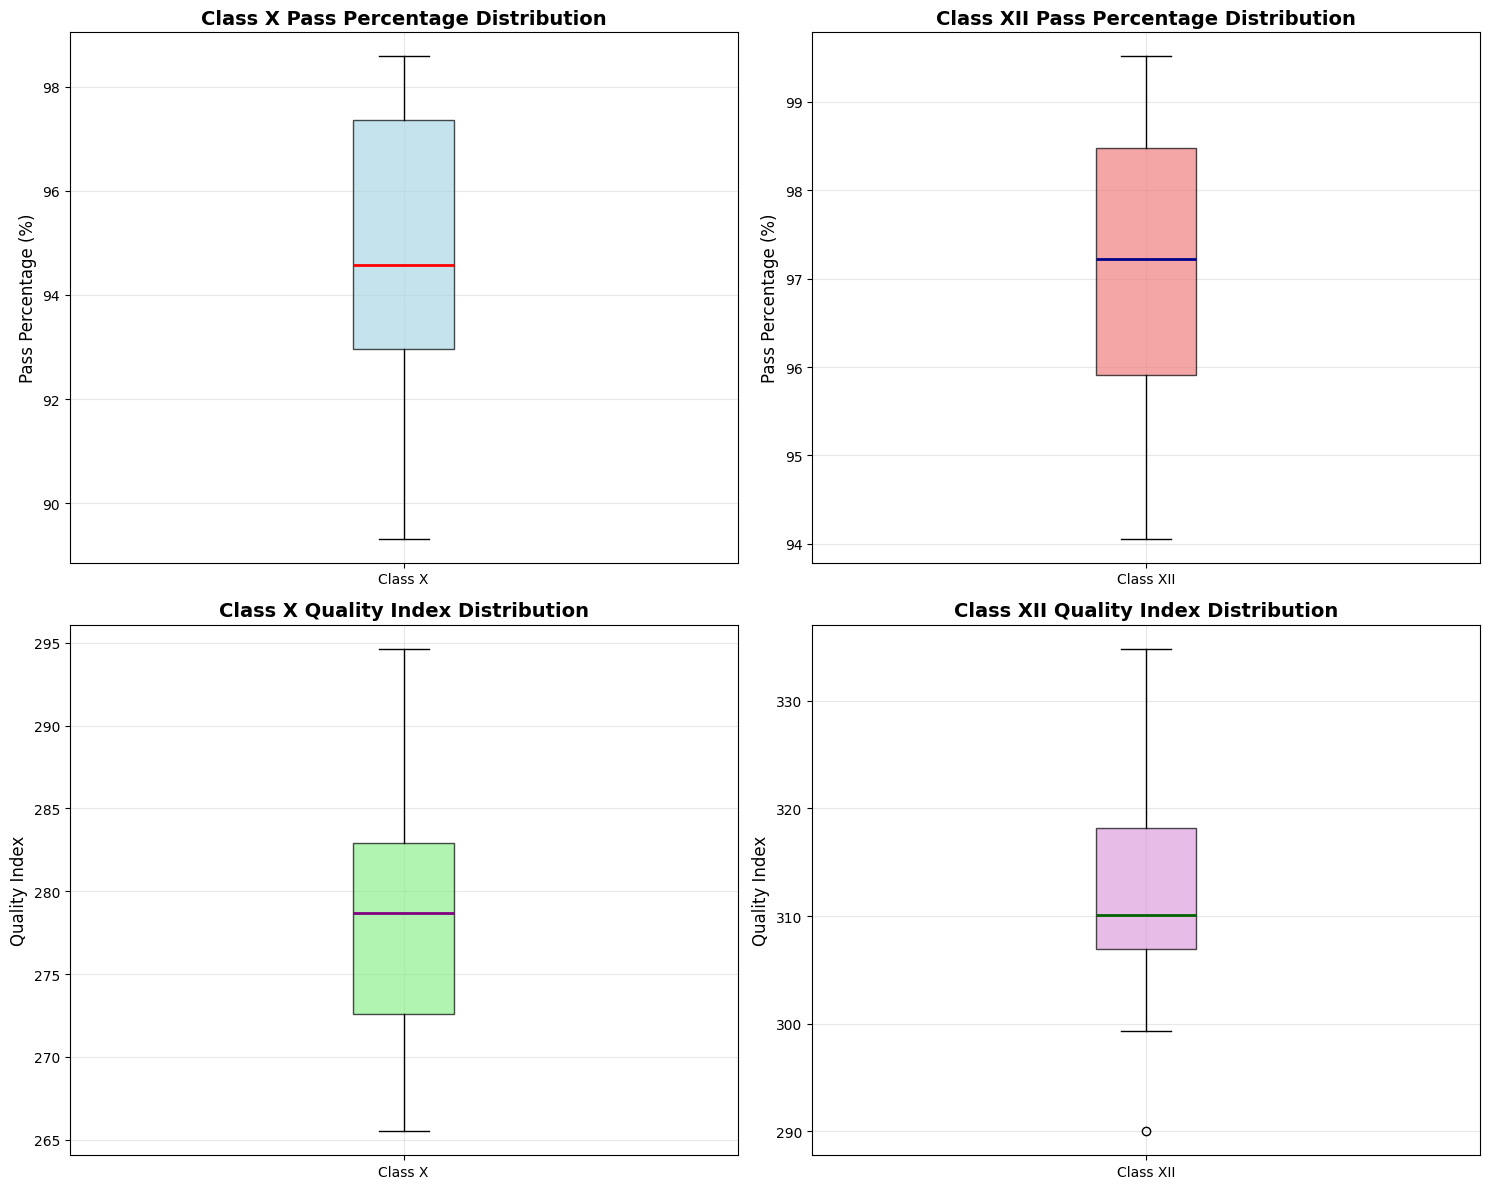

Summary Statistics:
Class X Pass Percentage - Mean: 94.92%, Median: 94.57%
Class XII Pass Percentage - Mean: 97.22%, Median: 97.22%
Class X Quality Index - Mean: 279.36, Median: 278.71
Class XII Quality Index - Mean: 312.44, Median: 310.10


In [7]:
# Box Plot: Distribution of Pass Percentages and Quality Indices
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Prepare data
class_x_pass_pct_clean = pd.to_numeric(df['PASS PERCENTAGE IN CLASS X - \n(Before Compt.) - 2023-24'], errors='coerce').dropna()
class_xii_pass_pct_clean = pd.to_numeric(df['PASS PERCENTAGE IN CLASS XII - (Before Compt.) - 2023-24'], errors='coerce').dropna()
class_x_quality_clean = pd.to_numeric(df['QUALITY INDEX IN CLASS X - \n(Before Compt) - 2023-24'], errors='coerce').dropna()
class_xii_quality_clean = pd.to_numeric(df['QUALITY INDEX IN CLASS XII - (Before Compt.) - 2023-24'], errors='coerce').dropna()

# Box plot for Class X Pass Percentage
bp1 = ax1.boxplot(class_x_pass_pct_clean, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2))
ax1.set_ylabel('Pass Percentage (%)', fontsize=12)
ax1.set_title('Class X Pass Percentage Distribution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(['Class X'])

# Box plot for Class XII Pass Percentage
bp2 = ax2.boxplot(class_xii_pass_pct_clean, patch_artist=True,
                  boxprops=dict(facecolor='lightcoral', alpha=0.7),
                  medianprops=dict(color='darkblue', linewidth=2))
ax2.set_ylabel('Pass Percentage (%)', fontsize=12)
ax2.set_title('Class XII Pass Percentage Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(['Class XII'])

# Box plot for Class X Quality Index
bp3 = ax3.boxplot(class_x_quality_clean, patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7),
                  medianprops=dict(color='purple', linewidth=2))
ax3.set_ylabel('Quality Index', fontsize=12)
ax3.set_title('Class X Quality Index Distribution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xticklabels(['Class X'])

# Box plot for Class XII Quality Index
bp4 = ax4.boxplot(class_xii_quality_clean, patch_artist=True,
                  boxprops=dict(facecolor='plum', alpha=0.7),
                  medianprops=dict(color='darkgreen', linewidth=2))
ax4.set_ylabel('Quality Index', fontsize=12)
ax4.set_title('Class XII Quality Index Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xticklabels(['Class XII'])

plt.tight_layout()
plt.savefig('box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Class X Pass Percentage - Mean: {class_x_pass_pct_clean.mean():.2f}%, Median: {class_x_pass_pct_clean.median():.2f}%")
print(f"Class XII Pass Percentage - Mean: {class_xii_pass_pct_clean.mean():.2f}%, Median: {class_xii_pass_pct_clean.median():.2f}%")
print(f"Class X Quality Index - Mean: {class_x_quality_clean.mean():.2f}, Median: {class_x_quality_clean.median():.2f}")
print(f"Class XII Quality Index - Mean: {class_xii_quality_clean.mean():.2f}, Median: {class_xii_quality_clean.median():.2f}")

### 3. Bar Plot
Comparing total number of schools and students across different districts in Delhi

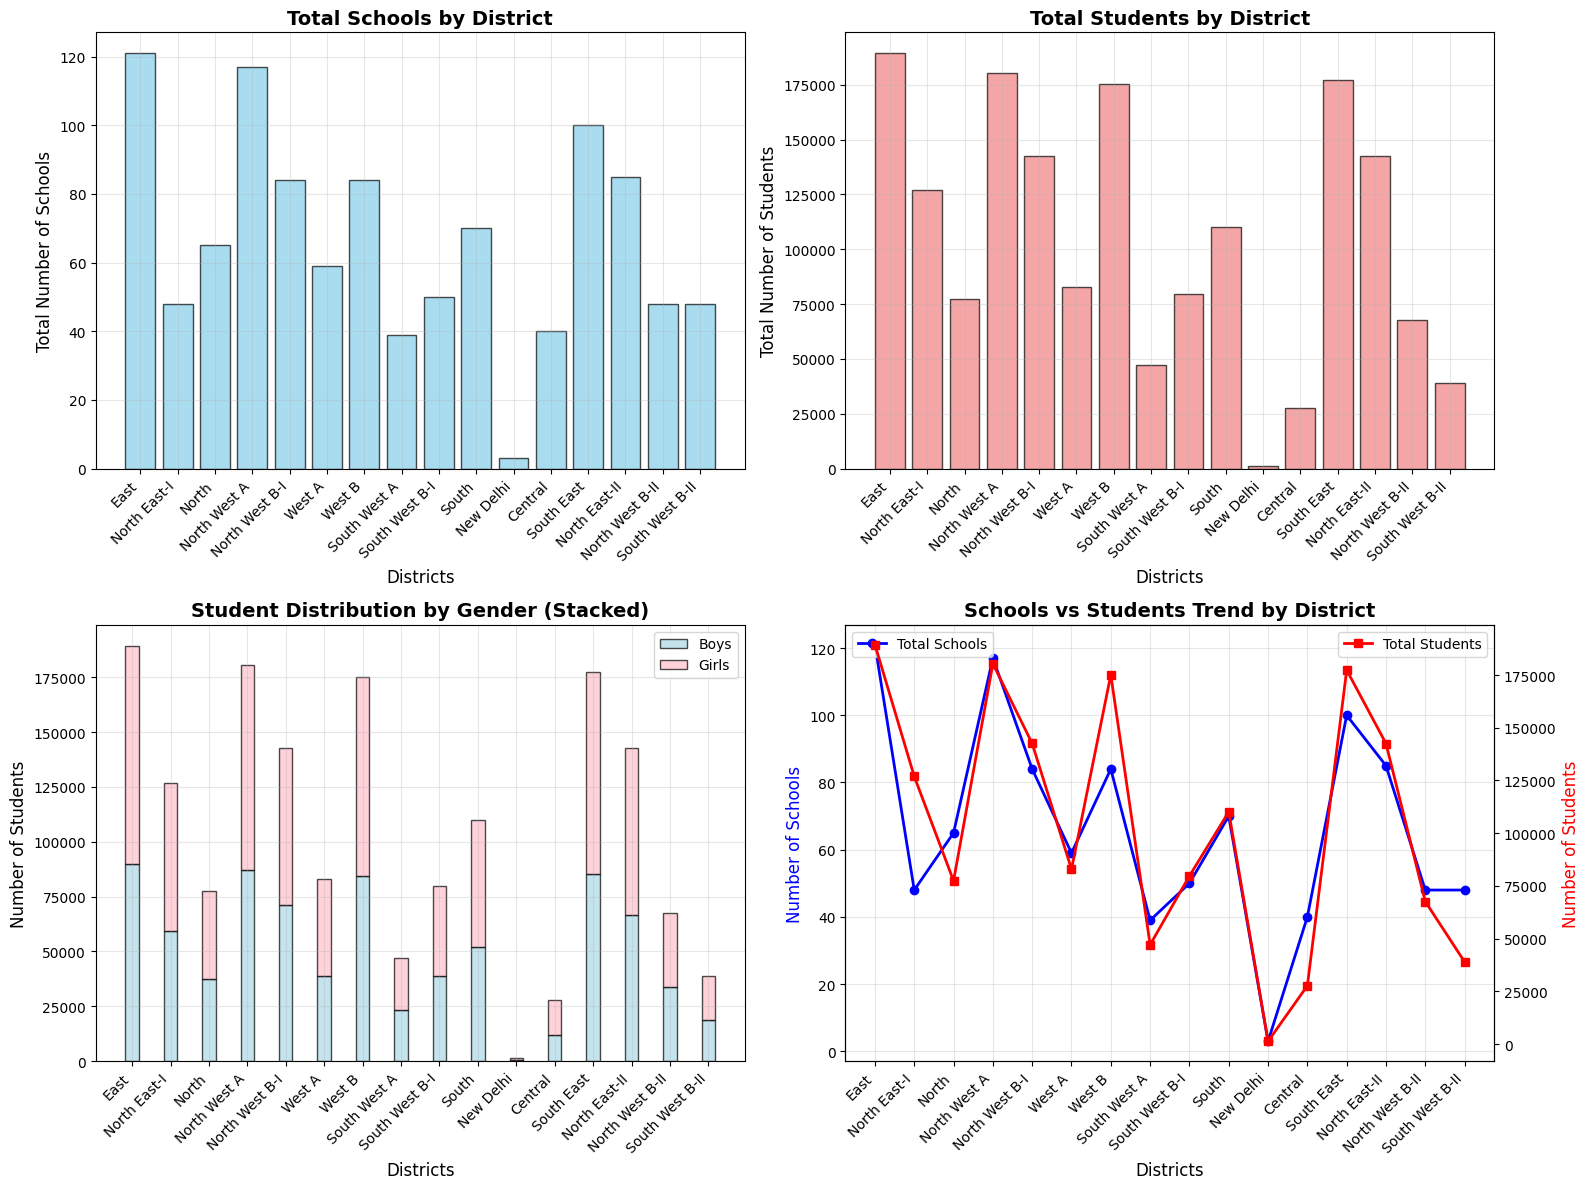

District-wise Analysis:
East: 121 schools, 189406 students (Ratio: 1565.3 students/school)
North East-I: 48 schools, 126931 students (Ratio: 2644.4 students/school)
North: 65 schools, 77396 students (Ratio: 1190.7 students/school)
North West A: 117 schools, 180388 students (Ratio: 1541.8 students/school)
North West B-I: 84 schools, 142549 students (Ratio: 1697.0 students/school)
West A: 59 schools, 82889 students (Ratio: 1404.9 students/school)
West B: 84 schools, 175104 students (Ratio: 2084.6 students/school)
South West A: 39 schools, 47082 students (Ratio: 1207.2 students/school)
South West B-I: 50 schools, 79706 students (Ratio: 1594.1 students/school)
South: 70 schools, 110108 students (Ratio: 1573.0 students/school)
New Delhi: 3 schools, 1295 students (Ratio: 431.7 students/school)
Central: 40 schools, 27641 students (Ratio: 691.0 students/school)
South East: 100 schools, 177374 students (Ratio: 1773.7 students/school)
North East-II: 85 schools, 142510 students (Ratio: 1676.6 stu

In [8]:
# Bar Plot: District-wise comparison of schools and students
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Clean and prepare data
districts = df['District'].tolist()
total_schools = pd.to_numeric(df['No of Schools - Total'], errors='coerce')
total_students = pd.to_numeric(df['No of Students - Total'], errors='coerce')
boys = pd.to_numeric(df['No of Students - Boys'], errors='coerce')
girls = pd.to_numeric(df['No of Students - Girls'], errors='coerce')

# Remove any NaN values for plotting
valid_indices = ~(total_schools.isna() | total_students.isna() | boys.isna() | girls.isna())
districts_clean = [districts[i] for i in range(len(districts)) if valid_indices.iloc[i]]
total_schools_clean = total_schools[valid_indices]
total_students_clean = total_students[valid_indices]
boys_clean = boys[valid_indices]
girls_clean = girls[valid_indices]

# 1. Bar plot for total schools by district
ax1.bar(range(len(districts_clean)), total_schools_clean, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Districts', fontsize=12)
ax1.set_ylabel('Total Number of Schools', fontsize=12)
ax1.set_title('Total Schools by District', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(districts_clean)))
ax1.set_xticklabels(districts_clean, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# 2. Bar plot for total students by district
ax2.bar(range(len(districts_clean)), total_students_clean, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Districts', fontsize=12)
ax2.set_ylabel('Total Number of Students', fontsize=12)
ax2.set_title('Total Students by District', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(districts_clean)))
ax2.set_xticklabels(districts_clean, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# 3. Stacked bar plot for boys vs girls
width = 0.35
ax3.bar(range(len(districts_clean)), boys_clean, width, label='Boys', color='lightblue', edgecolor='black', alpha=0.7)
ax3.bar(range(len(districts_clean)), girls_clean, width, bottom=boys_clean, label='Girls', color='pink', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Districts', fontsize=12)
ax3.set_ylabel('Number of Students', fontsize=12)
ax3.set_title('Student Distribution by Gender (Stacked)', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(districts_clean)))
ax3.set_xticklabels(districts_clean, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Line plot for comparison trends
ax4.plot(range(len(districts_clean)), total_schools_clean, marker='o', linewidth=2, label='Total Schools', color='blue')
ax4_twin = ax4.twinx()
ax4_twin.plot(range(len(districts_clean)), total_students_clean, marker='s', linewidth=2, label='Total Students', color='red')

ax4.set_xlabel('Districts', fontsize=12)
ax4.set_ylabel('Number of Schools', fontsize=12, color='blue')
ax4_twin.set_ylabel('Number of Students', fontsize=12, color='red')
ax4.set_title('Schools vs Students Trend by District', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(districts_clean)))
ax4.set_xticklabels(districts_clean, rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

# Add legends
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('bar_line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some insights
print("District-wise Analysis:")
for i, district in enumerate(districts_clean):
    ratio = total_students_clean.iloc[i] / total_schools_clean.iloc[i] if total_schools_clean.iloc[i] > 0 else 0
    print(f"{district}: {total_schools_clean.iloc[i]} schools, {total_students_clean.iloc[i]} students (Ratio: {ratio:.1f} students/school)")

print(f"\nHighest enrollment: {districts_clean[total_students_clean.idxmax()]} with {total_students_clean.max()} students")
print(f"Most schools: {districts_clean[total_schools_clean.idxmax()]} with {total_schools_clean.max()} schools")

## Analysis and Observations

### Key Findings from the Education Data Analysis

#### 1. Scatter Plot Analysis: Enrollment vs Pass Percentage
**Observations:**
- **Negative Correlation**: Both Class X and Class XII show negative correlations between the number of students who appeared for exams and pass percentages
  - Class X: Correlation = -0.437 (moderate negative)
  - Class XII: Correlation = -0.227 (weak negative)
- **Implication**: Districts with higher student numbers tend to have slightly lower pass percentages, possibly indicating resource constraints or management challenges in larger districts
- **Pass Percentage Range**:
  - Class X: 89-98.5%
  - Class XII: 94-99.5%
- **Performance**: Class XII consistently shows higher pass percentages than Class X across all districts

#### 2. Box Plot Analysis: Distribution Patterns
**Key Insights:**
- **Pass Percentage Distribution**:
  - Class X: Mean = 94.92%, Median = 94.57% (slightly right-skewed)
  - Class XII: Mean = 97.22%, Median = 97.22% (symmetric distribution)
- **Quality Index Distribution**:
  - Class X: Mean = 279.36, Median = 278.71 (range: 265-295)
  - Class XII: Mean = 312.44, Median = 310.10 (range: 290-335, with one outlier)
- **Variability**: Class X shows more variability in both pass percentages and quality indices compared to Class XII
- **Outliers**: Class XII has one outlier district with exceptionally low quality index (~290)

#### 3. Bar Plot Analysis: District-wise Infrastructure and Demographics
**Infrastructure Insights:**
- **Top Performing Districts by Numbers**:
  - Highest enrollment: **East District** (189,406 students, 121 schools)
  - Most efficient ratio: **North East-I** (2,644 students per school)
  - Smallest district: **New Delhi** (1,295 students, 3 schools)

**Resource Distribution:**
- **Student-to-School Ratios** vary significantly across districts (432-2,644 students/school)
- **Gender Distribution**: Relatively balanced across most districts with slight variations
- **Infrastructure Needs**: Districts like North East-I and West B show high student-to-school ratios, indicating potential overcrowding

#### 4. Overall Educational Landscape
**Strengths:**
- High overall pass percentages (>89% for Class X, >94% for Class XII)
- Consistent performance across districts
- Good gender balance in enrollment

**Areas for Improvement:**
- Address resource allocation in high-density districts
- Investigate factors causing lower pass rates in larger districts
- Focus on improving quality indices in underperforming areas

**Policy Implications:**
- Consider building additional schools in high-ratio districts
- Implement targeted support programs for larger districts to maintain quality
- Investigate best practices from high-performing districts for replication